# 1.Entendimento do problema

O cenário do negócio envolve uma empresa financeira que lida com milhares de transações de cartão de crédito por dia, e um grande problema que eles passam é a não identificação de fraudes, que resultaram em prejuízos financeiros para os bancos e impacto na confiança dos clientes. O objetivo do projeto é desenvolver um modelo de machine learning capaz de identificar automaticamente transações fraudulentas, reduzindo perdas e melhorando a segurança das operações.

Uma transação fraudulenta pode possuir muitos formatos porém existem certos padrões que torna possível sua percepção como por exemplo clonagem de cartões, compras não autorizadas e transações realizadas por terceiros sem o consentimento do titular, além é claro da análise de inconsistências como localização incomum da compra, valor da transação muito superior ao padrão, compras em categorias incomuns, distância entre transações muito alta em curto período, entre outros.


# 2. Mineração de Dados

Coletar os dados e entender um pouco desses dados:

- O conjunto de dados possui 1.000.000 de entradas.

- Contém 8 colunas, incluindo a coluna alvo:

  - distance_from_home

  - distance_from_last_transaction

  - ratio_to_median_purchase_price

  - repeat_retailer

  - used_chip

  - used_pin_number

  - online_order

  - fraud (coluna alvo, indica se a transação é fraudulenta ou não)

- Não há valores ausentes em nenhuma das colunas.



In [1]:
pip install pandas # instalando a biblioteca pandas para análise de dados

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [2]:
import pandas as pd # ativando a biblioteca pandas e colocando um apelido nela
import numpy as np # ativando a biblioteca numpy e colocando um apelido nela

In [3]:
data = pd.read_csv("card_transdata.csv")

In [4]:
data.head(5) # head = cabeça/começo do meu banco de dados

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
data.shape

(1000000, 8)

In [6]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [7]:
pd.DataFrame.info(data); # Demostra as informações do do banco de dados(variaveis e regras) obs.: É como se pegasse os database e virasse 90 graus

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [8]:
data.describe() # Fornece algumas medidas descritivas das variáveis(contagem, média, desvio padrão, mínimo, mediana (quartil 50%) e máxima)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


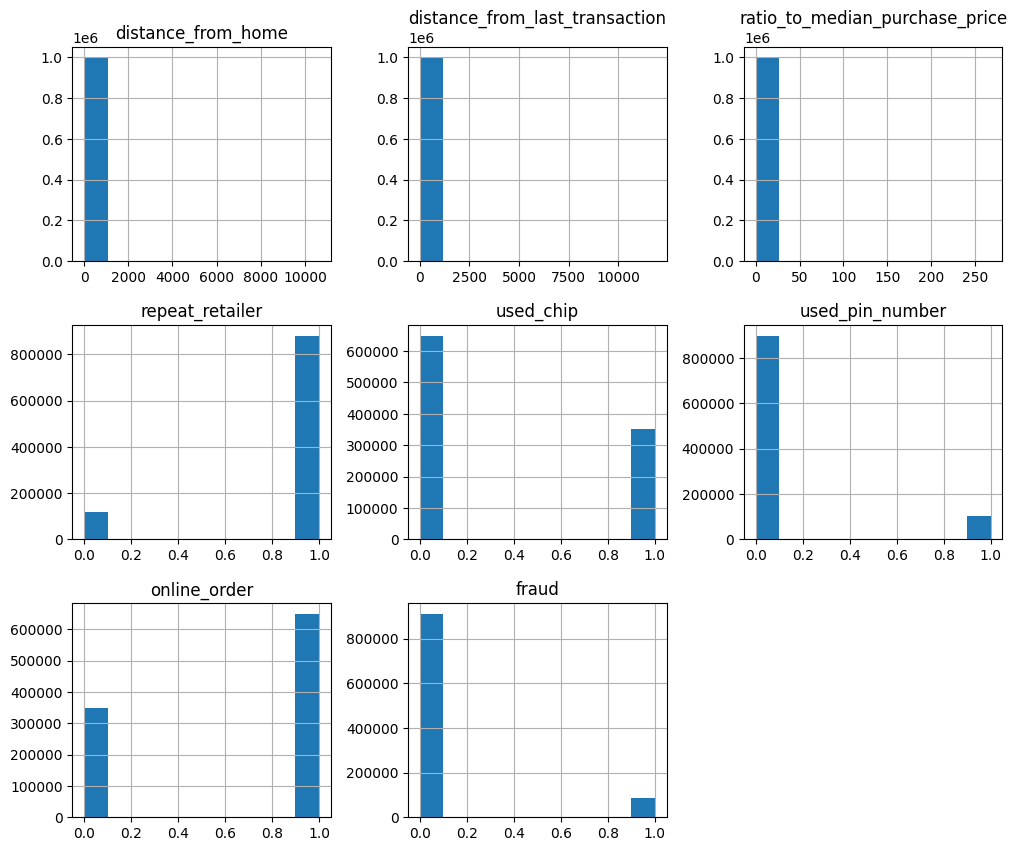

In [9]:
data.hist(figsize=(12,10)); # Abre os histogramas de cada variável

In [10]:
data.isna().sum() # Mostra a quantidade de dados nulos

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [11]:
print(data.duplicated().sum()) # Mostra a quantidade de dados duplicados

0


# 3. Limpeza de Dados

Não há valores ausentes, mas há possíveis outliers em variáveis como distância de casa e distância da última transação, que apresentam valores máximos muito superiores à média. Esses outliers podem indicar transações suspeitas.


In [12]:
data.drop_duplicates(inplace=True) # Apaguei os dados duplicados

# 4. Análise de Dados





In [13]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


### **distance_from_home**

A distância da residência até o local da transação varia entre aproximadamente 0,005 e 10.632 unidades de distância (provavelmente metros ou quilômetros). A média é de cerca de 26,63 e o desvio padrão é alto, em torno de 65,39, indicando grande variação entre as transações. A mediana é 9,97, o que mostra que metade das transações ocorreram a uma distância menor que esse valor.


### **distance_from_last_transaction**

A distância em relação à última transação registrada varia de valores mínimos próximos a zero até mais de 11.851 unidades. A média é de 5,04, com um desvio padrão de 25,84, evidenciando que existem muitos casos com distâncias significativamente diferentes. A mediana é 1,00, ou seja, 50% das transações ocorreram a até uma unidade de distância da anterior.


### **ratio_to_median_purchase_price**

A razão entre o valor da transação e o preço médio de compras do cliente vai de 0,004 até 267,8, com média de 1,82. Isso indica que, em média, os clientes gastam um pouco acima do valor médio de suas compras anteriores. O desvio padrão é de 2,80, sugerindo grande variação. A mediana é aproximadamente 1,0, o que significa que metade das transações estão abaixo e metade acima do valor médio de compras.


### **repeat_retailer**

Essa variável binária indica se a transação ocorreu com um varejista recorrente. Os valores possíveis são 0 e 1, sendo que cerca de 88% das transações (média de 0,88) ocorreram com varejistas que o cliente já havia utilizado anteriormente. Isso mostra um comportamento de consumo recorrente com os mesmos estabelecimentos.


### **used_chip**

Essa variável indica se o chip do cartão foi utilizado na transação. Os valores variam entre 0 e 1, com média de 0,35, o que mostra que cerca de 35% das transações usaram chip. A maioria das transações, portanto, foi realizada sem chip, o que pode incluir swipes ou transações online.


### **used_pin_number**

Indica se o número PIN foi utilizado durante a transação. Os dados mostram uma média de 0,10, ou seja, apenas cerca de 10% das transações utilizaram PIN, o que pode apontar para uma predominância de transações de débito sem autenticação adicional ou compras online.


### **online_order**

Essa coluna mostra se a transação foi realizada online. A média de 0,65 revela que aproximadamente 65% das transações foram feitas por meio digital. Isso indica uma forte presença do e-commerce nas transações analisadas.


### **fraud**

A coluna alvo indica se a transação foi classificada como fraude (1) ou não (0). A média é de aproximadamente 0,087, o que significa que cerca de 8,7% das transações no conjunto de dados foram identificadas como fraudulentas. Isso demonstra um forte desbalanceamento da base, já que a maioria das transações é legítima.

In [14]:
pip install ydata_profiling # Biblioteca para análise de dados

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


# 5. Análise de Dados

Para melhorar a performance do modelo KNN, podemos aplicar algumas técnicas de engenharia de features:

 - Transformações estatísticas: Calcular média, desvio padrão ou Z-score para identificar transações fora do padrão.

 - Codificação de dados categóricos: Se existissem textos como “Sim” ou “Não”, seria necessário convertê-los para números (por exemplo, com Label Encoding ou One-Hot Encoding). No nosso caso, os dados já estão binários (0 ou 1), então não precisa converter.

 - Combinação de variáveis binárias: Podemos criar novas variáveis que misturam informações, como:

  - Transações online sem chip e sem PIN (potencialmente mais arriscadas).

  - Compras repetidas em varejistas com valor alto, que podem tentar burlar o sistema.

  - Mudanças no padrão de uso online ou no uso de chip e PIN, que podem indicar comportamento suspeito.

 - Seleção de variáveis: Podemos testar quais variáveis mais ajudam o KNN a identificar fraudes, e remover as menos relevantes para deixar o modelo mais eficiente.

In [15]:
X = data[["distance_from_home", "distance_from_last_transaction", 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip','used_pin_number', 'online_order']] #Entradas do modelo

In [16]:
Y = data["fraud"] #Saida do modelo

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
dtype: int64

In [20]:
X = X[~X.isna()]

In [21]:
X = X.dropna()

In [22]:
Y.isna().sum()  # Mostra os dados nulos

np.int64(0)

In [23]:
Y = Y[~Y.isna()]

In [24]:
# Divisão dos dados em treino (70%) e teste (30%)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Machine Learning - Modelagem

Neste projeto, será usado um modelo de Machine Learning supervisionado, pois temos um conjunto de dados com rótulos (sabemos quais transações são fraudes e quais não são). Os modelos de Machine Learning supervisionados utilizam algoritmos(no caso desse projeto um modelo de classificação) para aprender padrões nos dados e fazer previsões

O algoritmo escolhido é o K-Nearest Neighbors (KNN), um modelo de classificação que funciona identificando as transações mais parecidas com a que queremos prever. Ele analisa os “vizinhos mais próximos” para decidir se uma transação é ou não uma fraude.

In [33]:
from sklearn.neighbors import KNeighborsClassifier #Importando o modelo de ML KNN da biblioteca sklearn

In [34]:
knn = KNeighborsClassifier(n_neighbors=10) #Criando o modelo, dentro do parenteses fica a arquitetura do modelo

In [35]:
knn.fit(X_train_scaled, Y_train) #Treinando o modelo de ML KNN

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [36]:
predito = knn.predict(X_test_scaled)

# 7. Avaliação do Modelo

Para garantir que o modelo seja avaliado de forma justa, será utilizada a técnica de validação Hold-Out, que consiste em dividir o conjunto de dados em duas partes: uma para treinamento e outra para teste. Isso permite treinar o modelo com parte dos dados e depois testá-lo com dados que ele nunca viu, simulando situações reais.

Além disso, os dados passam por um processo de padronização usando o StandardScaler, já que o algoritmo KNN é sensível à escala das variáveis. Essa preparação ajuda o modelo a fazer previsões mais precisas e confiáveis.

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
confusion_matrix(Y_test, predito)

array([[273697,     82],
       [   343,  25878]])

In [32]:
accuracy_score(Y_test, predito)

0.9985833333333334

# 8. Entrega dos Resultados

Como dito antes, os pontos mais importantes para o bom desempenho de um Modelo de Machine Learning é a capacidade de encontrar padrões, no caso padrões de comportamento suspeito, anomalias e contexto da transação.
Meu produto seria um "Software de Detecção de Fraudes em Tempo Real", um sistema pronto para uso, onde empresas poderiam comprar, instalar e configurar, parecido com softwares de automação industrial ou ferramentas de análise de dados
Meu modelo seguiria o seguinte formato:
- Analisaria transações de cartão de crédito automaticamente.
- Classificaria cada transação como "fraudulenta" ou "segura".
- Fornecendo alertas e relatórios para os clientes (ex.: bancos, fintechs ou empresas de pagamento).
- Permitindo ajustes manuais no nível de sensibilidade do modelo.
- Envia notificações automáticas para as equipes de segurança.
- Gera relatórios diários ou semanais com estatísticas de fraudes.
- Integra-se facilmente a sistemas de pagamento existentes.